In [194]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import tensorly as tl
from tensorly.regression.tucker_regression import TuckerRegressor
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from skimage import color
from sklearn.metrics import mean_squared_error
import matplotlib
import re
import os
import cv2

In [52]:
import matplotlib as mpl
mpl.rc("savefig", dpi=100) # Adjust for higher-resolution figures

In [53]:
def read_img(path):
    """
    Read image and store it as an array, given the image path. 
    Returns the 3 dimensional image array.
    """
    img = Image.open(path)
    ###Resize
    img = img.resize((640,360),Image.ANTIALIAS)
    
    img_arr = np.array(img, dtype='int32')
    img.close()
    return img_arr

def display_image(arr):
    """
    display the image
    input : 3 dimensional array
    """
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))


In [54]:
# #Raw image preprocessing for cropping

# raw_working_dir = r'C:\Users\Edward\Documents\DonationCoder\AutomaticScreenshotter\Screenshots\2020\11\30'

# l = len([name for name in os.listdir(raw_working_dir)])

# img_arr = np.zeros((l,250,410,3))

# cter = 0

# for i, filename in enumerate(os.listdir(raw_working_dir)):
#     cter += 1
#     #print(filename)
#     img = read_img(raw_working_dir + '\\' + filename)
#     img_arr[i] = img[50:-60,40:-190,:]
    
    
#     matplotlib.image.imsave('C:\\Users\\Edward\\ISYE6740_project\\data\\image_stream\\video6\\img6stream' + str(i) + '.jpg', img_arr[i].astype(np.uint8))
    
#     if cter == 39:
#             break

In [55]:
# plt.imshow(img_arr[38].astype(np.uint8))

In [56]:
#regex for reading files in order
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [72]:
working_dir = r'C:\Users\Edward\ISYE6740_project\data\image_stream'
#working_dir = r'C:\Users\Edward\ISYE6740_project\data\image_stream\video1'

In [73]:
f = [name for name in os.listdir(working_dir)]

['video1', 'video2', 'video3', 'video4', 'video5', 'video6']

In [205]:
img_dic = {}

for folder in f:
    folderdir = working_dir + '\\' + folder
    l = len([name for name in os.listdir(folderdir)])
    #img_arr = np.zeros((l,360,640,3))
    img_arr = np.zeros((l,72,128,3))
    
    for i ,filename  in enumerate(sorted(os.listdir(folderdir), key=numericalSort)):
        #print ("Current File Being Processed is: " + infile)
        img = read_img(folderdir + '\\' + filename)
        
        img = np.array(img, dtype='uint8')
        res = cv2.resize(img, dsize=(128,72))
        img_arr[i] = res
        
    img_dic[folder] = img_arr

In [79]:
# l = len([name for name in os.listdir(working_dir)])
# img_arr = np.zeros((l,360,640,3))

# for i ,filename  in enumerate(sorted(os.listdir(working_dir), key=numericalSort)):
#     #print ("Current File Being Processed is: " + infile)
#     img = read_img(working_dir + '\\' + filename)
#     img_arr[i] = img

In [257]:
ii = img_dic['video2'][0]
iig = color.rgb2gray(ii)

np.matrix.flatten(iig, order = 'F').shape

(9216,)

In [258]:
#make flatten grayscale image array
flat_dic_gray = {}
for vid in f:    
    img_arr = np.zeros((img_dic[vid].shape[0],9216))   
    for i in range(img_dic[vid].shape[0]):
        ii = img_dic[vid][i]
        iig = color.rgb2gray(ii) 
        img_arr[i] = np.matrix.flatten(iig, order = 'F')

    flat_dic_gray[vid] = img_arr
#unflatten:
#.reshape((x, y))

In [260]:
flat_dic_gray['video2'].shape

(59, 9216)

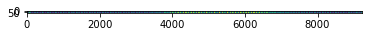

In [292]:
# fig = plt.figure(figsize=(100, 100))
# ax1 = plt.axes([0, 60, 0, 1000])
#plt.axes().set_aspect('equal', 'datalim')
# plt.axis('equal')

# axes = plt.gca()
# axes.set_ylim([0,59])

plt.imshow(flat_dic_gray['video2'])

In [297]:
l = flat_dic_gray['video2'].shape[0]
diff = []
for i in range(1,l):
    diff.append(sum(abs(flat_dic_gray['video2'][i] - flat_dic_gray['video2'][i-1])))

In [298]:
diff

[346241.7781000013,
 364582.87599999784,
 397205.9583000006,
 370137.60899999976,
 347794.9441000003,
 321634.5232000013,
 446141.1577999975,
 243351.60739999983,
 288532.92140000034,
 260686.69760000013,
 316252.3843000012,
 340469.9021,
 296737.6287999974,
 313436.29299999983,
 251455.9186000001,
 280361.1255999993,
 336124.157700002,
 315298.2100000003,
 342283.8163999969,
 333767.93330000073,
 293563.61329999886,
 282233.10550000105,
 296869.7270999987,
 262460.9437999997,
 369711.85889999877,
 368247.48650000064,
 257272.10050000073,
 332383.4484000004,
 364783.8701000008,
 355745.5006999999,
 298543.0398999995,
 349515.8958000001,
 233779.33200000034,
 219548.53329999917,
 320477.22159999993,
 272414.7132999988,
 255387.60469999924,
 274233.10980000027,
 267253.29479999957,
 227479.9440000007,
 155966.05479999966,
 278570.8144000007,
 287448.0247000004,
 301706.9742999992,
 346828.67930000037,
 288209.3498000008,
 321224.5386000002,
 238868.48640000162,
 250053.58279999945,
 2464

video1 fails at 22

video2 fails at 30

video3 fails at 25

video4 fails at 37

video5 fails at 32

video6 fails at 15

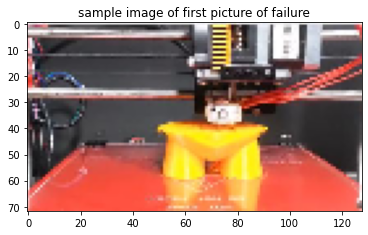

In [245]:
plt.imshow(img_dic['video2'][21].astype(np.uint8))
plt.title('sample image of first picture of failure')
plt.show()

take batches of 10 images and create a image tensor, in greyscale

In [214]:
tens_dic = {}

for vid in f:
    l = img_dic[vid].shape[0]
    
    img_tens = np.zeros((l-10,10,72,128))

    for i in range(l-10):
        img_tens[i] = color.rgb2gray(img_dic[vid][i:i+10])

    tens_dic[vid] = img_tens

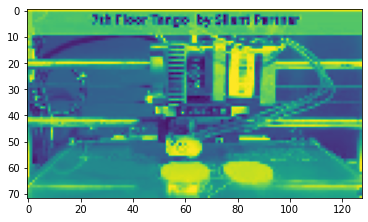

In [247]:
plt.imshow(tens_dic['video2'][2][1])

In [216]:
import pickle

# with open(working_dir + '\\tens_dic.p', 'wb') as fp:
#     pickle.dump(tens_dic, fp, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open(working_dir + '\\tens_dic.p', 'rb') as fp:
#     tens_dic = pickle.load(fp)

In [218]:
tens_dic['video2'].shape

(49, 10, 72, 128)

In [166]:
# l = tens_dic['video3'].shape[0]

# fig, axarr = plt.subplots(l-10,10, figsize=(16, 16))
# #fig.tight_layout() 
# for i in range(l-10):
#     for j in range(10):
#         axarr[i,j].imshow(tens_dic['video3'][i][j].astype(np.uint8), cmap='gray')
#         axarr[i,j].axis('off')


video1 fails at 22

video2 fails at 30

video3 fails at 25

video4 fails at 37

video5 fails at 32

video6 fails at 15

In [220]:
y_dic = {}

fail_point = [22,30,25,37,32,15]
for i, vid in enumerate(f):
    l = tens_dic[vid].shape[0]
    y = np.zeros(l)
    ratio = 0 
    for j in range(l):
        if j > fail_point[i]-10:
            ratio += 1
            if ratio > 10:
                ratio = 10
        y[j] = ratio/10
    y_dic[vid] = y

In [221]:
y_dic['video2']

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5,
       0.6, 0.7, 0.8, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ])

Tucker Decomposition

In [312]:
tens_dic['video2'].shape

(49, 10, 72, 128)

In [313]:
tens_dic['video3'].shape

(44, 10, 72, 128)

In [336]:
X = np.concatenate((tens_dic['video2'], tens_dic['video3'], tens_dic['video4']), axis = 0)

In [337]:
y = np.concatenate((y_dic['video2'], y_dic['video3'], y_dic['video4']), axis = 0)

use to pred video 5

In [ ]:
#X = tens_dic['video2']
#y = y_dic['video2']

#t_pred = []
t_mse = []
for rank in range (1,6):
    estimator = TuckerRegressor(weight_ranks=[rank, rank, rank], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
    estimator.fit(X, y)
    
    #t_pred.append(estimator.predict(test))
    
    t_mse.append(mean_squared_error(y, estimator.predict(X)))



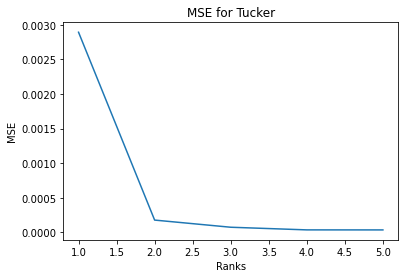

In [329]:
plt.plot(range(1,6), t_mse)
plt.title('MSE for Tucker')
plt.xlabel('Ranks')
plt.ylabel('MSE')
plt.show()

rank 4 mse best

In [330]:
estimator = TuckerRegressor(weight_ranks=[5, 5, 5], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
estimator.fit(X, y)

In [331]:
X6 = tens_dic['video6']
y6 = y_dic['video6']

In [332]:
y6_pred = estimator.predict(X6)
y6_pred = [round(i,1) for i in y6_pred]

In [335]:
y6_pred

[-0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.2,
 0.1,
 -0.0,
 -0.1,
 -0.1,
 -0.2,
 -0.2,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.2,
 -0.0,
 0.1,
 0.2]

In [333]:
y6

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.2, 0.3])

In [334]:
y6_pred - y6

array([-0.1, -0.1, -0.1, -0.1, -0. ,  0.1,  0.1,  0.2,  0.2,  0.3,  0.3,
        0.2,  0.1, -0. , -0.1, -0.1, -0.2, -0.2, -0.3, -0.3, -0.3, -0.3,
       -0.2, -0.1, -0.1, -0.1])

In [230]:
estimator.predict(X3)

array([ 0.08147355,  0.08488325,  0.0785327 ,  0.0405365 ,  0.04973443,
        0.06110868,  0.03665714,  0.06112104,  0.06497796,  0.06856973,
        0.05824948,  0.01602788, -0.04581373, -0.09909203, -0.17528831,
       -0.1459384 , -0.12632102, -0.05793898,  0.0084401 ,  0.07382471,
        0.12544207,  0.16735719,  0.14750765,  0.08334067, -0.00328176,
       -0.07854671, -0.10349275, -0.08933555, -0.01680755,  0.01119502,
        0.03860174,  0.032003  ,  0.03787238,  0.00610649, -0.01459158,
       -0.04921164, -0.05192668, -0.03085366,  0.02141197,  0.04756924,
        0.02683428, -0.04393799, -0.14020539, -0.22402857])

In [231]:
y3

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. ])

Anomoly detection

Change detection